In [1]:
import pickle
import random

import torch
from transformers import Blip2Processor

from lib.daquar.daquar_classification import DaquarClassification
from lib.models.feature_visualizer import FeatureVisualizer
from lib.types import HFRepos, ModelTypes, Suffix, VQAParameters
from lib.visualization import (
    display_class_specific_images,
    show_image,
)

%load_ext autoreload
%autoreload 2

# Load dependencies
processor = Blip2Processor.from_pretrained(HFRepos.BLIP2_OPT)

DIR = "analysis/daquar/"

/home/atomwalk12/anaconda3/envs/dev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Results for DAQUAR

In [2]:
args = VQAParameters(Suffix.Train)  # using combined dataset
args.processor = processor
dataset = DaquarClassification(args)
# 366534476
# 102006499 - report
split = "train"
path = f"data/models/daquar/classifier/366534476/features_{split}.pkl"  # classifier outputs
data = pickle.load(open(path, "rb"))
features = data["features"]
labels = data["labels"]


feature_visualizer = FeatureVisualizer(
    id_to_answer=dataset.id_to_answer, dataset_name="daquar"
)
feature_visualizer.set_features(features, labels, split)
feature_visualizer.visualize_features_with_umap(
    save_path=f"{DIR}/5.daquar_{split}_features"
)

INFO:lib.dataset_base:Loaded 10976 items from /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/daquar/classification/train.pkl
/home/atomwalk12/anaconda3/envs/dev/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have 

In [3]:
args = VQAParameters(Suffix.Train)  # using combined dataset
args.processor = processor
dataset = DaquarClassification(args)

split = "val"
path = f"data/models/daquar/classifier/366534476/features_{split}.pkl"  # classifier outputs
data = pickle.load(open(path, "rb"))
features = data["features"]
labels = data["labels"]


feature_visualizer = FeatureVisualizer(
    id_to_answer=dataset.id_to_answer, dataset_name="daquar"
)
feature_visualizer.set_features(features, labels, split)
feature_visualizer.visualize_features_with_umap(
    save_path=f"{DIR}/5.daquar_{split}_features"
)

INFO:lib.dataset_base:Loaded 10976 items from /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/daquar/classification/train.pkl
/home/atomwalk12/anaconda3/envs/dev/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have

# Comparing difficult classes

In [8]:
args = VQAParameters(Suffix.All)  # using combined dataset
args.processor = processor
dataset = DaquarClassification(args)

INFO:lib.dataset_base:Loaded 12468 items from /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/daquar/classification/all.pkl


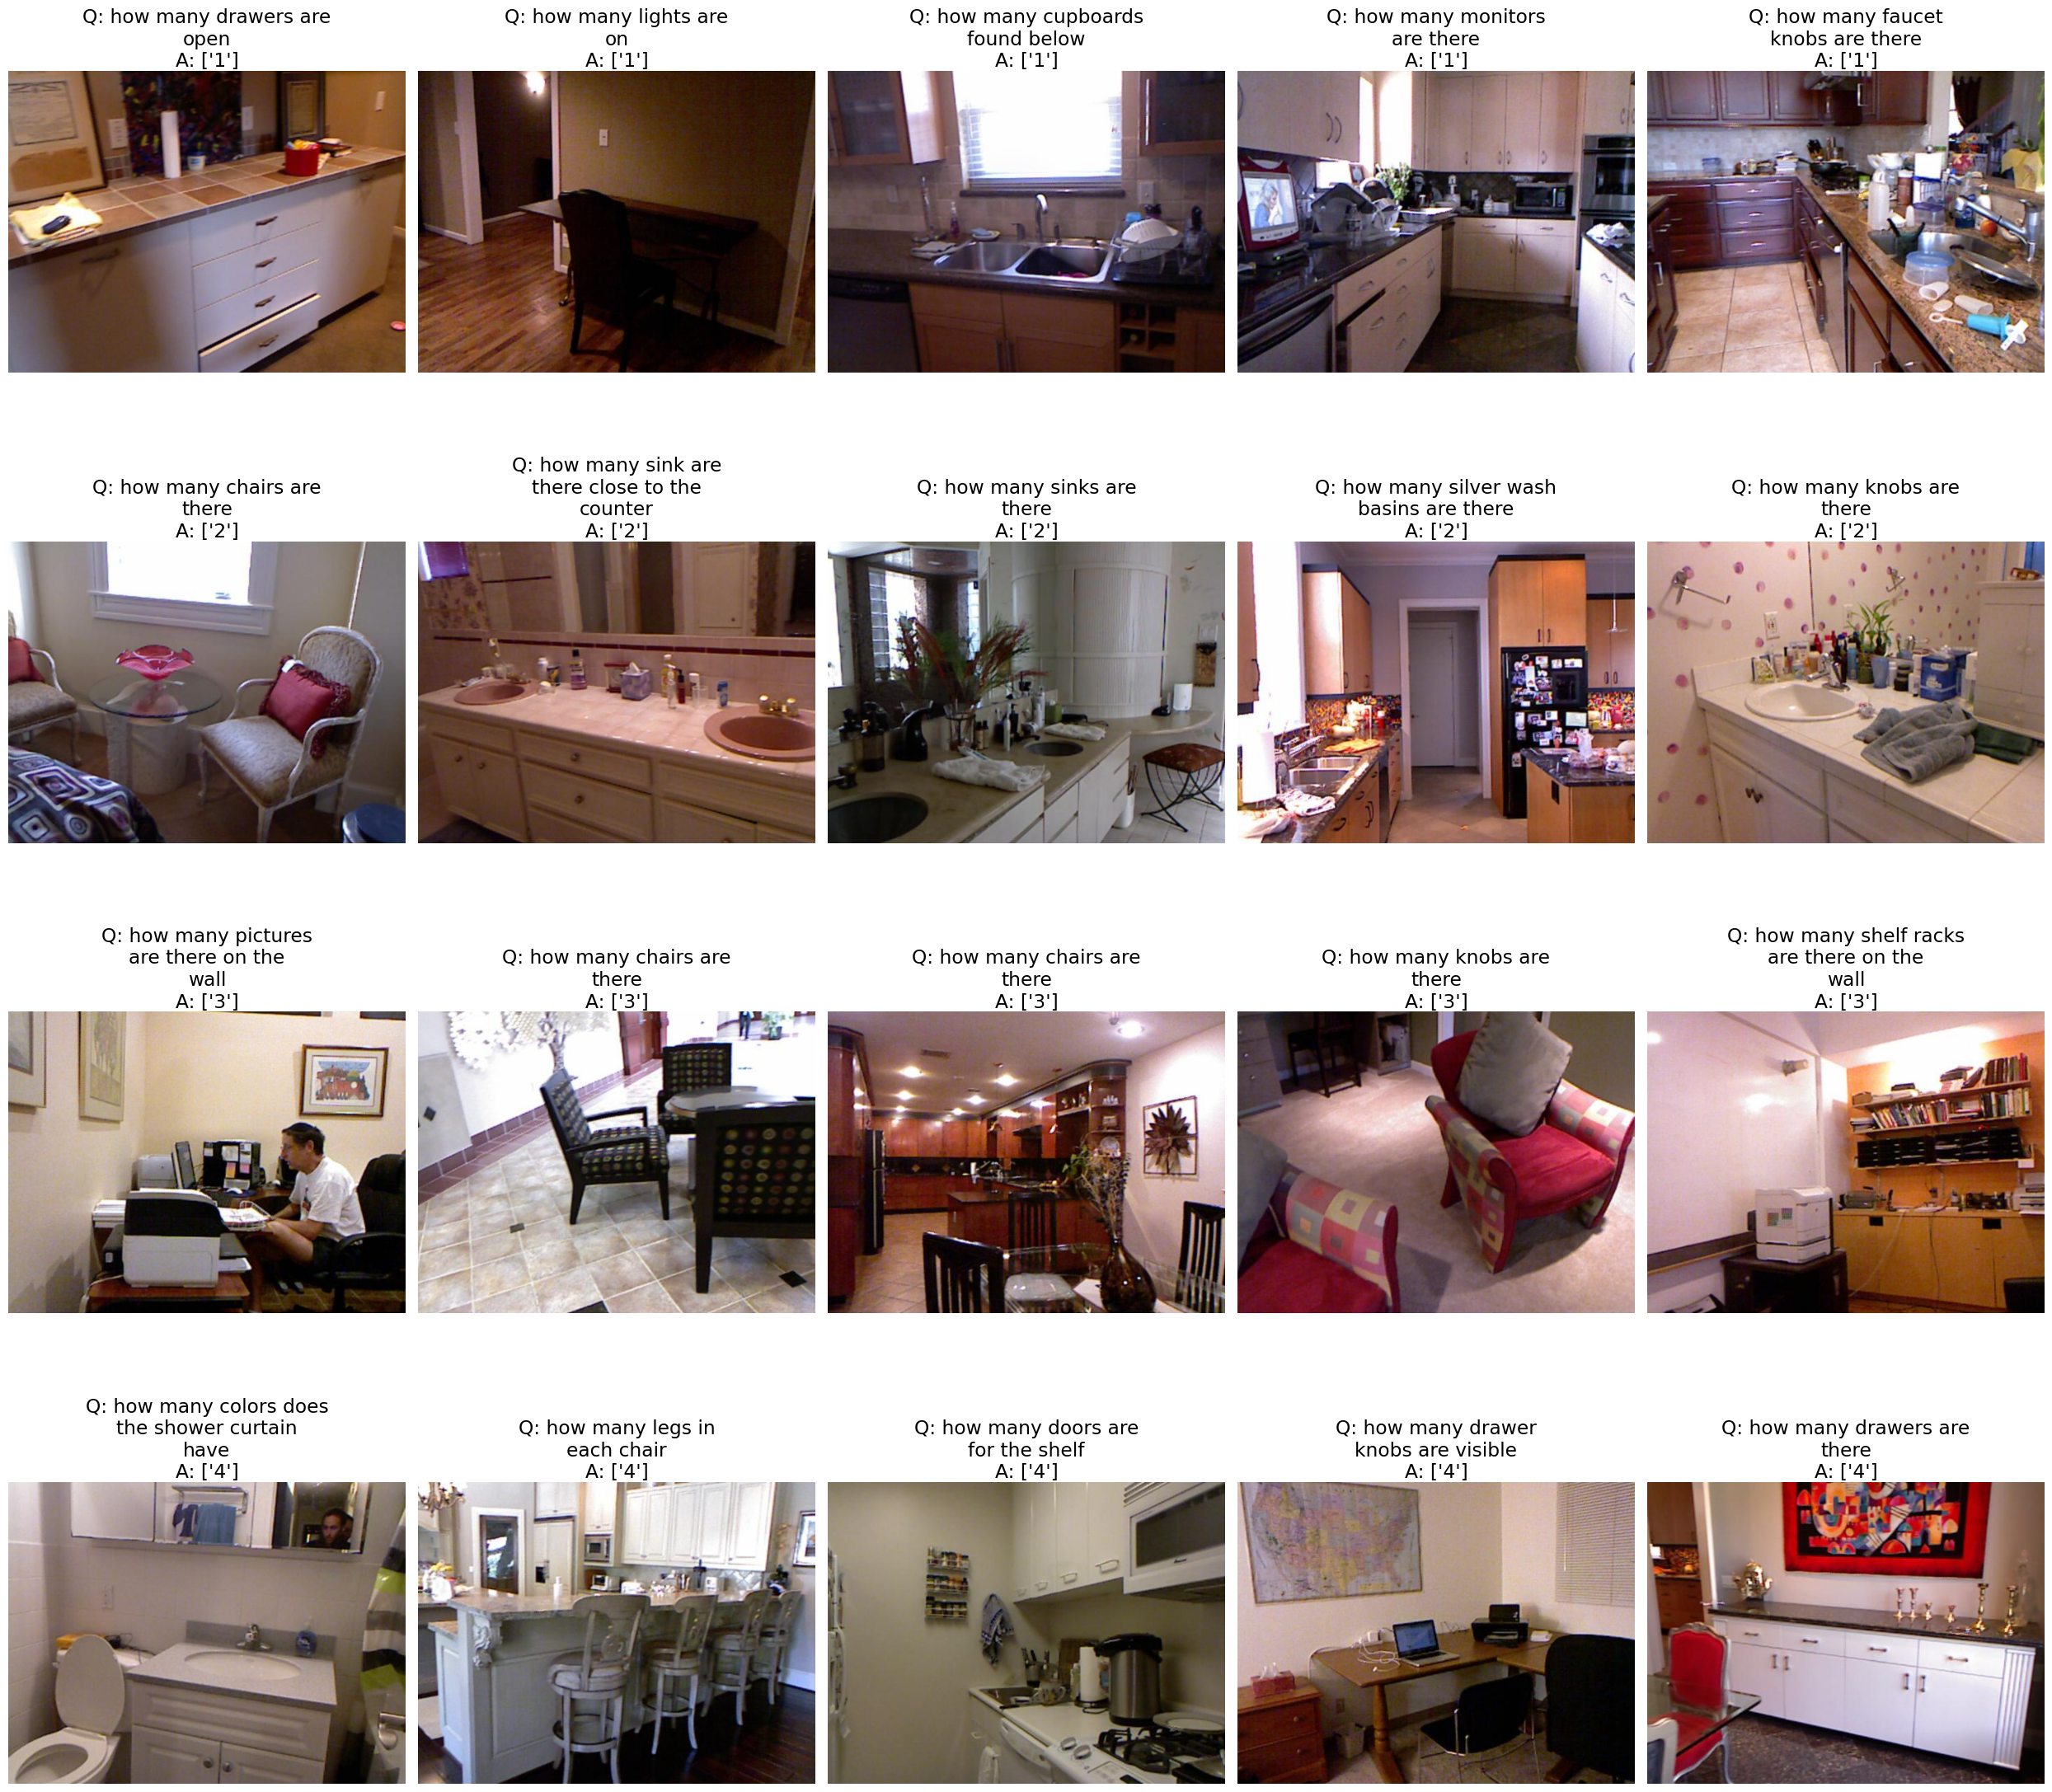

Class-specific sample images saved as analysis/daquar//7.daquar_class_specific_samples.pdf


In [9]:
class_types = [["1"], ["2"], ["3"], ["4"]]  # Example class types
display_class_specific_images(
    dataset.raw_dataset,
    "DAQUAR",
    f"{DIR}/7.daquar_class_specific_samples.pdf",
    class_types,
    font_size=24,
)

# Live evaluation

This section allows to randomly choose images from the dataset and predict the answer.

In [2]:
from lib.utils import EXPERIMENT
from lib.types import TrainingParameters
from lib.types import DatasetTypes
from lib.trainers.classification_trainer import ClassificationTrainer

EXPERIMENT.set_seed(2024).apply_seed()

test_args = VQAParameters(split="val", is_testing=True, use_proportional_split=True)
test_args.processor = processor

dataset = DaquarClassification(test_args)

parameters = TrainingParameters(
    dataset_name=DatasetTypes.DAQUAR,
    resume_checkpoint=True,
    model_name=ModelTypes.BLIP2Classifier,
    is_trainable=False,
    train_args=None,
    val_args=None,
    test_args=test_args,
    resume_state=False,
    is_testing=True,
    use_wandb=False,
)

module = ClassificationTrainer(parameters)
model = module.model
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

INFO:lib.experiments:Setting self.seed=2024


INFO:lib.dataset_base:Loaded 2746 items from /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/daquar/classification/val.pkl
INFO:lib.trainers.base_trainer:LoraConfig(peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path=None, revision=None, task_type=None, inference_mode=False, r=8, target_modules='all-linear', lora_alpha=8, lora_dropout=0.1, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=None, init_lora_weights='gaussian', layers_to_transform=None, layers_pattern=None, rank_pattern={}, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', loftq_config={}, use_dora=False, layer_replication=None, runtime_config=LoraRuntimeConfig(ephemeral_gpu_offload=False))
INFO:lib.trainers.base_trainer:BitsAndBytesConfig {
  "_load_in_4bit": true,
  "_load_in_8bit": false,
  "bnb_4bit_compute_dtype": "float32",
  "bnb_4bit_quant_storage": "uint8",
  "bnb_4bit_quant_type": "nf4",
  "bnb_4bit_use_double_quant

[INFO] Using GPU: NVIDIA GeForce RTX 4090



INFO:lib.dataset_base:Loaded 2746 items from /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/daquar/classification/val.pkl
`low_cpu_mem_usage` was None, now default to True since model is quantized.
INFO:lib.models.blip2_classifier_experiment5:config.interm_dim=1024


trainable params: 0 || all params: 1,181,823,762 || trainable%: 0.0000


/home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/lib/models/base_classifier.py:114: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.classifier

2 4


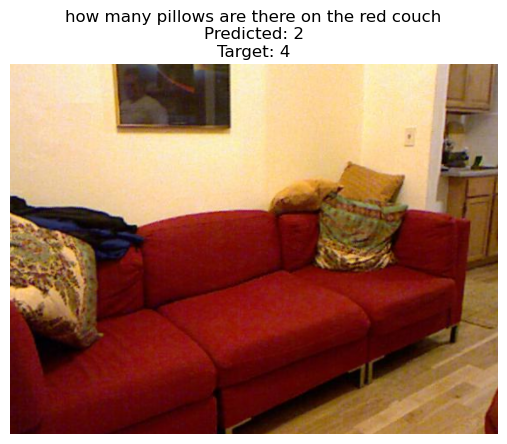

In [5]:
sample = random.randint(0, len(dataset))
data = dataset[sample]

pixel_values = data["pixel_values"].unsqueeze(0).to(device)
input_ids = data["input_ids"].unsqueeze(0).to(device)
attention_mask = data["attention_mask"].unsqueeze(0).to(device)
labels = data["labels"].unsqueeze(0).to(device)

outputs = model(
    pixel_values=pixel_values,
    input_ids=input_ids,
    attention_mask=attention_mask,
    labels=labels,
    log=False,
)
_, preds = torch.max(outputs.logits, 1)
_, target_pred = torch.max(labels, 1)

predicted = dataset.id_to_answer[preds.item()]
target = dataset.id_to_answer[target_pred.item()]

print(predicted, target)
show_image(dataset.raw_dataset[sample], predicted, target)